# Basic PyTorch Neural Network
---
## What will we work with ? 
---
Time to put the pieces together. In this sections we'll :
- Creat a multi-layer deep learning model
- Load data
- Train and Validate the model

# To - Do
---

1. Should I add a third layer ?
   <br>After adding third layer, we got to know that we can achieve low training error for some cases. However, the testing RMSE for those cases remains high. 

For the ones where testing RMSE is low, training RMSE is high.


---
---

## Perform Standard Imports
---

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Creating A Model Class 
---
## Activation : Leaky Relu for L1 | Relu for L2 | 
---

| Input Layer | Layer 1 | Layer 2 | Output Layer | TEST_RMSE |
| ----------- | ------- | ------- | ------------ | --------- |
| 10 | 100 | 2 | 1 | 38.23873138 |
| 10 | 50 | 25 | 1 | 2232.96899414 |
| 10 | 60 | 20 | 1 | 2277.70410156 |
| 10 | 40 | 20 | 1 | 2330.19702148 |
| 10 | 20 | 30 | 1 | 2262.53344727 |
| 10 | 30 | 20 | 1 | 2346.64111328 |
| 10 | 200 | 100 | 1 | 2408.80444336 |
| 10 | 35 | 15 | 1 | 2238.07788086 |
| 10 | 30 | 2 | 1 | 46.84243011 |
| 10 | 50 | 10 | 1 | 1894.40747070 |

---

## Activation : Leaky Relu for L1 | Relu for L2 | Relu for L3 |
---

| Layer 1 | Layer 2 | Layer 3 | TEST_RMSE |
| ----------- | ------- | ------- | ------------ |
| 100 | 50 | 2  | 39.08463287 |
| 30  | 20 | 10 | 1057.11279297 |
| 100 | 20 | 10 | 2224.03369141 |
| 20  | 6  | 2  | 38.90698242   |
| 20  | 6  | 1  | 2256.34155273 |
| 30  | 10 | 2  | 2717.19726562 | (good training rmse)
| 30  | 11 | 3  | 2684.04199219 | (good training rmse)
| 30  | 11 | 5  | 2796.58154297 | (good training rmse)
| 50  | 11 | 5  | 2818.67822266 | (good training rmse)
| 30  | 20 | 2  | 146.12924194  |
| 21  | 11 | 3  | 2631.75976562 | (v. good training rmse)
| 21  | 10 | 3  | 2739.56372070 | (good training rmse)
| 200 | 44 | 10 | 2683.55517578 | (training rmse : 300)


---


## Number of Layers and Activation Function (Finalized)
## L1 = 66 | L2 = 44 | L3 = 22
## L1 = 200 | L2 = 44 | L3 = 10
---

In [2]:
l1 = input("Number of Layers in L 1 : ")
l2 = input("Number of Layers in L 2 : ")
l3 = input("Number of Layers in L 3 : ")
# n_iter = input("Number of Epochs : ")

l1 = int(l1)
l2 = int(l2)
l3 = int(l3)
# n_iter = int(n_iter)
n_iter = 2000

Number of Layers in L 1 : 200
Number of Layers in L 2 : 44
Number of Layers in L 3 : 10


In [3]:
class Model(nn.Module):
    def __init__(self, in_features=10, l1=l1, l2=l2, l3=l3, out_features=1):
        
        super().__init__()
        # input layer
        self.fc1 = nn.Linear(in_features, l1)
        # hidden layer 1
        self.fc2 = nn.Linear(l1, l2)
        # hidden layer 2
        self.fc3 = nn.Linear(l2, l3)
        #output layer
        self.out = nn.Linear(l3, out_features)
        
          
    def forward(self, x):
        
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = (self.fc3(x))
        
        x = self.out(x)
        
        return x

## Instantiate the Model class using parameter defaults
---

In [4]:
torch.manual_seed(44)
model = Model()

## Load Dataset

In [5]:
train_d = pd.read_csv('../data_data/train_infections.csv')
test_d = pd.read_csv('../data_data/test_infections.csv')

In [6]:
X_train = train_d.iloc[:,0:10]
y_train = train_d.iloc[:,10:11]

X_test = test_d.iloc[:,0:10]
y_test = test_d.iloc[:,0:10:11]

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [7]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

## Prepare DataLoader
---
For this analysis we don't need to create a Dataset object. <br>
But we should take advantage of PyTorch's DataLoader tool. <br>
Even though our dataset is small, we'll load it into our model in two batches. <br>
This technique becomes very helpful with large datasets.

In [8]:
trainloader = DataLoader(X_train, batch_size=100, shuffle=True)

testloader = DataLoader(X_test, batch_size=10, shuffle=False)

In [9]:
# For Redo
torch.manual_seed(44)
model = Model()

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [11]:
epochs = n_iter
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():1.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 8657997.00000000
epoch: 11  loss: 3011211.50000000
epoch: 21  loss: 3256908.00000000
epoch: 31  loss: 2924596.75000000
epoch: 41  loss: 2908815.25000000
epoch: 51  loss: 2867730.75000000
epoch: 61  loss: 2858215.75000000
epoch: 71  loss: 2839967.25000000
epoch: 81  loss: 2824086.00000000
epoch: 91  loss: 2808145.25000000
epoch: 101  loss: 2791290.50000000
epoch: 111  loss: 2773702.75000000
epoch: 121  loss: 2755039.00000000
epoch: 131  loss: 2734512.75000000
epoch: 141  loss: 2710903.25000000
epoch: 151  loss: 2684885.25000000
epoch: 161  loss: 2657677.00000000
epoch: 171  loss: 2630458.50000000
epoch: 181  loss: 2604459.50000000
epoch: 191  loss: 2580463.75000000
epoch: 201  loss: 2556786.00000000
epoch: 211  loss: 2533231.50000000
epoch: 221  loss: 2509760.50000000
epoch: 231  loss: 2486358.00000000
epoch: 241  loss: 2463153.00000000
epoch: 251  loss: 2440203.75000000
epoch: 261  loss: 2418356.75000000
epoch: 271  loss: 2397068.25000000
epoch: 281  loss: 2376213.7500

Text(0.5, 0, 'epoch')

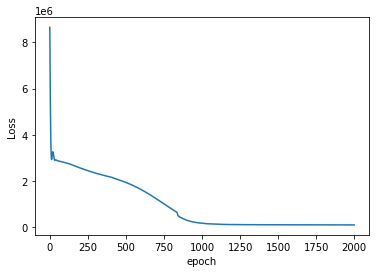

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [16]:
# TO EVALUATE THE ENTIRE TRAINING SET
with torch.no_grad():
    y_val = model(X_train)
    loss = torch.sqrt(criterion(y_val, y_train))
print(f'RMSE: {loss:.8f}')

RMSE: 300.34558105


## Validate the model
---
Here, we want to run the entire test set through the model, and compare it to the known value. <br>
For this step, we don't want to update weights and biases, so we set torch.no_grad()

In [14]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 2683.55517578


# Calculating the R2 score for regression
---
#### Using scikit learn library to calculate this
#### r2_score(y_true, y_pred)
---

## Note : This metrics shows goodness of fit for the regression model. We don't have a time series data in this model. So, it will be not useful use this metric for now. Might be useful once we use this model for a particular county with a time series data.

In [17]:
score = r2(y_train, y_val)
score

0.9850548186197268